### Implenting Huffman Algorithm :
#### First we count the frequency of each character in the text. Then we create a heap of nodes. Then we build the Huffman tree. Finally we generate the Huffman codes.Scrolling to the left and adding '0' to the code. Scrolling to the right and adding '1' to the code.Then generate the Huffman codes for each character. Finally we draw the Huffman tree.

##### made by : Ali Kazempour / Shahed University / autumn 2024 
##### contact me on Telegram : https://t.me/A_Kazempour83

Huffman Codes:
e: 000
d: 001
r: 010
w: 011
l: 10
o: 110
h: 1110
 : 1111


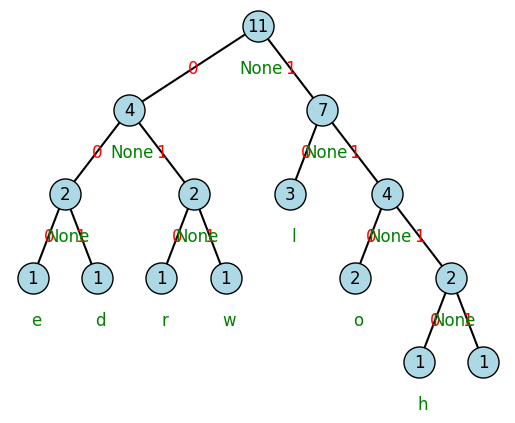

In [1]:
import collections
import heapq
import matplotlib.pyplot as plt

class Node:
    def __init__(self, char, freq):  
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):    # Comparing nodes based on frequency
        return self.freq < other.freq

text = input("Enter your text here: ")
frequency = collections.Counter(text) # Count the frequency of each character in the text
heap = [Node(char, freq) for char, freq in frequency.items()] # Create a heap of nodes
heapq.heapify(heap) # Build the heap

# Build the Huffman tree
while len(heap) > 1: # Loop until there is only one node in the heap
   # Poping  the two nodes with the lowest frequencies
   node1 = heapq.heappop(heap) 
   node2 = heapq.heappop(heap)

   merged = Node(None, node1.freq + node2.freq) # Creating a new node with the sum of frequencies
   # Add the two nodes as children
   merged.left = node1 
   merged.right = node2

   heapq.heappush(heap, merged) # Adding  the merged node back to the heap


root = heap[0] # The root of the tree is the first node in the heap

# a function to generate Huffman codes
def generate_huffman_codes(node, current_code="", huffman_codes={}):
    if node is None:
        return

    # If the node is a leaf, we add its code to the dictionary    
    if node.char is not None:
        huffman_codes[node.char] = current_code
    
    # Scrolling to the left and adding '0' to the code
    generate_huffman_codes(node.left, current_code + "0", huffman_codes)

    # Scrolling to the right and adding '1' to the code    
    generate_huffman_codes(node.right, current_code + "1", huffman_codes)

huffman_codes = {}
generate_huffman_codes(root, "", huffman_codes)

print("Huffman Codes:")
for char, code in huffman_codes.items():
    print(f"{char}: {code}")

# ---------- AI code for drawing huffman tree ---------

def plot_tree(root):
    fig, ax = plt.subplots()
    ax.axis('off')  

    positions = {}  
    depths = {}     

    assign_positions(root, positions, depths)

    edges = []
    get_edges(root, edges)

    for edge in edges:
        parent, child, edge_value = edge
        x0, y0 = positions[parent], -depths[parent]
        x1, y1 = positions[child], -depths[child]
        ax.plot([x0, x1], [y0, y1], c='black', zorder=1)  

        mid_x, mid_y = (x0 + x1) / 2, (y0 + y1) / 2  
        ax.text(mid_x, mid_y, str(edge_value), fontsize=12, ha='center', va='center', zorder=4, color='red')  

    for node in positions:
        x, y = positions[node], -depths[node]
        ax.scatter(x, y, s=500, c='lightblue', edgecolors='black', zorder=2)
        ax.text(x, y, str(node.freq), fontsize=12, ha='center', va='center', zorder=3)
        ax.text(x + 0.1, y - 0.5, str(node.char), fontsize=12, ha='center', va='center', zorder=4, color='green')

    plt.show()

def assign_positions(node, positions, depths, depth=0, x=[0]):
    if node.left:
        assign_positions(node.left, positions, depths, depth + 1, x)
    positions[node] = x[0]
    depths[node] = depth
    x[0] += 1
    if node.right:
        assign_positions(node.right, positions, depths, depth + 1, x)

def get_edges(node, edges):
    if node:
        if node.left:
            edges.append((node, node.left, 0))  
            get_edges(node.left, edges)
        if node.right:
            edges.append((node, node.right, 1))  
            get_edges(node.right, edges)

plot_tree(root)
